In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import sklearn as skl

## Dataset Split

In [11]:
# separating input and output
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
# separating training and validation
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.30, random_state=50)
print('Input dimension = ', x_train.shape, '\nNo. examples for validation = ', len(y_val))

input dimension =  (212, 13) 
No. examples for validation =  91


## Training the model

In [17]:
# Defining training folds
cv_ = KFold(n_splits=5)
# Evaluation Metric
evaluation_metric = 'f1'
# Initializing the model
MLP_model = MLPClassifier()
# Parameter Establishment
MLP_parameters = {'hidden_layer_sizes': [(30, 20, 10, 5), (30, 15, 5), (30, 15)],
            'activation': ['tanh', 'relu'],
            'solver': ['lbfgs', 'adam'],
            'learning_rate_init': [0.01, 0.001],
            'early_stopping': [True],
            'n_iter_no_change': [6],
            'max_iter': [20000]}

In [23]:
model_parameter_finder = GridSearchCV(estimator=MLP_model, param_grid= MLP_parameters, cv=cv_)
model_parameter_finder.fit(x_train,y_train)
# Creating model with best parameters and training with train data
MLP_final = MLPClassifier(**model_parameter_finder.best_params_)
MLP_final.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

NameError: name 'skl' is not defined

MLP best parameter: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (30, 20, 10, 5), 'learning_rate_init': 0.01, 'max_iter': 20000, 'n_iter_no_change': 6, 'solver': 'lbfgs'}, best score: 79.20% 


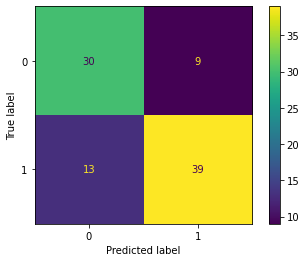

In [29]:
# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(MLP_final, x_val, y_val)
print('MLP best parameter: %s, best score: %.2f%% '%(model_parameter_finder.best_params_, 100*model_parameter_finder.best_score_))

In [30]:
prediction = MLP_final.predict(x_val)
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        39
           1       0.81      0.75      0.78        52

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



## Saving the model

In [ ]:
import pickle

In [34]:
pkl_filename = 'pickle_MLP_model'
with open(pkl_filename, 'wb') as file:
    pickle.dump(MLP_final, file)

## Loading the Model

In [35]:
with open(pkl_filename, 'rb') as file:
    pickle_model=pickle.load(file)

print(pickle_model)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(30, 20, 10, 5), learning_rate_init=0.01,
              max_iter=20000, n_iter_no_change=6, solver='lbfgs')


## Testing the loaded model

In [37]:
score = pickle_model.score(x_val, y_val)
print('Test score: {0:.2f}%'.format(100*score))

pickle_model.predict(x_val)

Test score: 75.82%


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0])